# Preparacion de los datos

## Generar data frame

In [73]:
import pandas as pd
import numpy as np

# # Load the data
# INEGI = pd.read_csv('datosINEGI.csv')
# CONEVAL = pd.read_csv('datosCONEVAL.csv', encoding='latin1')

# # Filter rows where NOM_LOC == "Total del Municipio"
# INEGI_total = INEGI[INEGI['NOM_LOC'] == "Total del Municipio"]

# # Make MUN in INEGI_total be ENTIDAD * 1000 + MUN
# INEGI_total['MUN'] = INEGI_total['ENTIDAD'] * 1000 + INEGI_total['MUN']

# # Drop columns that are not needed from CONEVAL(only columns needed are 'clave_municipio', 'pobreza_m', "ic_asalud")
# CONEVAL = CONEVAL[['clave_municipio', 'pobreza_m', 'ic_asalud']]

# # MERGE INEGI_total and CONEVAL from MUN and clave_municipio
# merged = pd.merge(INEGI_total, CONEVAL, left_on='MUN', right_on='clave_municipio')
# # Drop clave_municipio
# merged = merged.drop(columns=['clave_municipio'])

# #Drop columns that are not needed from merged, first 9 columns are not needed
# merged = merged.drop(columns=merged.columns[0:9])

# #fix data types, all numeric
# merged = merged.apply(pd.to_numeric, errors='coerce')

# # Drop missing columns and rows
# merged.isnull().sum().sort_values(ascending=False)

# # drop TAMLOC column
# merged = merged.drop(columns='TAMLOC')

# #drop missing values
# merged = merged.dropna()

# # Save the merged data
# merged.to_csv('merged.csv', index=False)



## Seleccionar el conjunto de caracteristicas

In [74]:
data = pd.read_csv('merged.csv')
print(data.shape)
print(data.isna().sum())

# Divide all but last 2 columns by POBTOT
data.iloc[:, :-2] = data.iloc[:, :-2].div(data['POBTOT'], axis=0)
data.head()


(2466, 278)
POBTOT         0
POBFEM         0
POBMAS         0
P_0A2          0
P_0A2_F        0
              ..
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
pobreza_m      0
ic_asalud      0
Length: 278, dtype: int64


/var/folders/nq/zht86vzj6n5g3py55h5xd7xr0000gn/T/ipykernel_61594/3613415549.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2461    1.0
2462    1.0
2463    1.0
2464    1.0
2465    1.0
Name: POBTOT, Length: 2466, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-2] = data.iloc[:, :-2].div(data['POBTOT'], axis=0)
/var/folders/nq/zht86vzj6n5g3py55h5xd7xr0000gn/T/ipykernel_61594/3613415549.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.513090
1       0.509838
2       0.509648
3       0.512235
4       0.505738
          ...   
2461    0.511262
2462    0.505989
2463    0.518926
2464    0.509215
2465    0.512107
Name: POBFEM, Length: 2466, dtype: float64' has dtype incompatible with int64, ple

,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,...,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,pobreza_m,ic_asalud
0,1.0,0.513090,0.486910,0.046757,0.023070,0.023687,0.952259,0.489527,0.462732,0.918021,...,0.188220,0.137293,0.085302,0.059148,0.003476,0.007685,0.078217,0.000770,21.7,20.0
1,1.0,0.509838,0.490162,0.061510,0.031803,0.029707,0.938102,0.477841,0.460261,0.894423,...,0.087822,0.075326,0.011565,0.010789,0.007315,0.028077,0.139825,0.003434,36.0,16.5
2,1.0,0.509648,0.490352,0.054232,0.027142,0.027090,0.945167,0.482197,0.462970,0.904567,...,0.112498,0.081528,0.023725,0.023210,0.007605,0.015519,0.138386,0.002369,41.3,21.0
3,1.0,0.512235,0.487765,0.060706,0.031706,0.029000,0.939294,0.480529,0.458765,0.897294,...,0.102412,0.097882,0.013118,0.011235,0.008176,0.024353,0.112471,0.002941,33.7,17.6
4,1.0,0.505738,0.494262,0.053452,0.026014,0.027438,0.945478,0.479185,0.466293,0.904887,...,0.153315,0.103772,0.071547,0.050658,0.003694,0.008851,0.088102,0.001139,23.1,21.1


In [75]:
from sklearn.feature_selection import SelectKBest, f_regression

array = data.values

# Separate features (X) and targets (Y)
X = array[:, :-2]  # All but last two columns
Y = array[:, -2:]  # Last two columns (indicators)

# Compute feature importance for each target separately
scores = np.zeros(X.shape[1])  # Initialize score array

for i in range(Y.shape[1]):  # Loop over target variables
    selector = SelectKBest(score_func=f_regression, k='all')  # Get scores for all features
    selector.fit(X, Y[:, i])
    scores += selector.scores_  # Sum scores across both indicators

# Rank features based on combined scores
top_k = 10  # Number of features to select
best_features_idx = np.argsort(scores)[-top_k:]  # Indices of top k features

# Select the best features
X_selected = X[:, best_features_idx]


Index(['VPH_INTER', 'VPH_SPMVPI', 'VPH_AUTOM', 'PDER_IMSS', 'VPH_CVJ',
       'VPH_PC', 'PDER_SEGP', 'VPH_HMICRO', 'PDER_SS', 'PSINDER'],
      dtype='object')


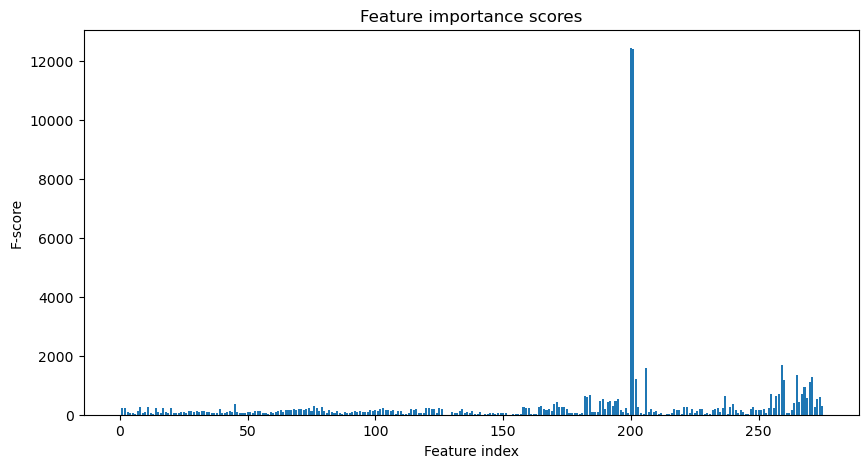

In [76]:
print(data.columns[best_features_idx])

# Plot all scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature index')
plt.ylabel('F-score')
plt.title('Feature importance scores')
plt.show()

In [77]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information scores
scores = np.zeros(X.shape[1])

for i in range(Y.shape[1]):  # Loop over target variables
    scores += mutual_info_regression(X, Y[:, i])

# Select the top k features
top_k = 10
best_features_idx = np.argsort(scores)[-top_k:]
X_selected = X[:, best_features_idx]


Index(['VPH_CVJ', 'VPH_CEL', 'VPH_PC', 'PDER_IMSS', 'VPH_AUTOM', 'VPH_REFRI',
       'VPH_HMICRO', 'PDER_SEGP', 'PDER_SS', 'PSINDER'],
      dtype='object')


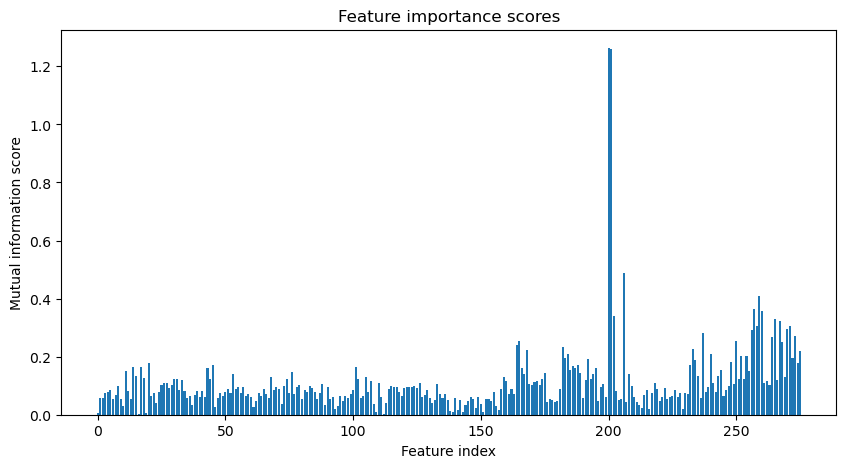

In [78]:
print(data.columns[best_features_idx])

# Plot all scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature index')
plt.ylabel('Mutual information score')
plt.title('Feature importance scores')
plt.show()
